## Estatística - Aula 6

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
from scipy import stats

### Recap dos conteúdos até o momento

$\bullet$ Probabilidade. 

$\bullet$ Distribuição.

$\bullet$ Parâmetros e estimadores.

$\bullet$ Intervalo de confiança.





Os passos que geralmente fazemos para o Intervalo de Confiança (e que faremos para Teste de Hipóteses).

- Indicar qual é o parâmetro de interesse $\theta$.

- Determinar um estimador $\hat{\theta}$.

- Estabelecer uma estatística de teste, que depende de $\hat{\theta}$ e $\theta$. 

## Teste de Hipóteses

O teste de hipótese **sempre** se refere a um parâmetro $\theta$, mas nem sempre isso é tão nítido. 

✍ Para isso, usaremos sempre a estatística de teste, daí a importância de compreender diferentes distribuições.



Como o próprio nome diz, faremos testes para verificar se as hipóteses sobre os nossos parâmetros parecem ser válidas ou não. Para isso, temos alguns termos novos.

$\bullet$ Hipótese nula ($H_{0}$) - é a nossa hipótese de partida, onde sempre será ela que será rejeitada ou não. Para isso, toda a matemática (que não será desenvolvida de uma forma profunda aqui) sempre é feita inicialmente considerando que a hipótese nula é inicialmente verdadeira. 

$\bullet$ Hipótese alternativa ($H_{1}$) - é a hipótese complementar à hipótese nula. **Geralmente** é a hipótese que queremos evidenciar algo sobre o nosso parâmetro. 

Por conta disso, a hipótese alternativa é o que queremos provar. Isso é, se queremos provar que a a média (parâmetro $\theta$) de uma distribuição é igual a 0, precisamos coletar evidências de que $\theta$ seja diferente de zero.

Temos dois tipos de testes de hipótese:

$\bullet$ Teste unilateral - $\theta$ $\lt$ $\theta_{0}$

$\bullet$ Teste bilateral - $\theta$ = $\theta_{0}$

O teste de hipóteses é feito sob incertezas. E o que isso significa?

Provavelmente, teremos erros.

Erro tipo I: Rejeitar $H_{0}$ quando $H_{0}$ é verdadeiro. 

Erro tipo II: Aceitar $H_{0}$ quando $H_{0}$ é falso. 


In [ ]:
mu1 = 3
sigma1 = 2
n = 10


alpha = 0.05
cutoff1 = stats.norm.ppf(alpha/2)
cutoff2 = stats.norm.ppf(1-alpha/2)

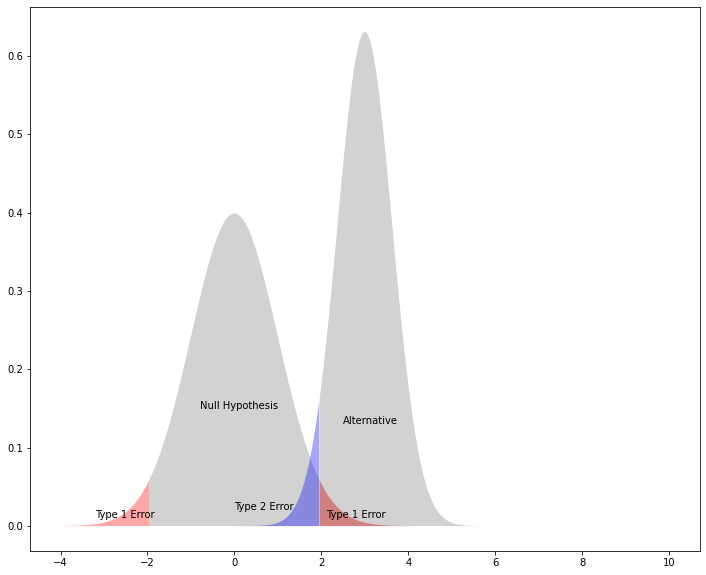

In [ ]:
plt.figure(figsize=(12,10))


plt.fill_between(x=np.arange(-4,cutoff1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,cutoff1,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(cutoff1,cutoff2,0.01), 
                 y1= stats.norm.pdf(np.arange(cutoff1,cutoff2,0.01)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(cutoff2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(cutoff2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,cutoff1,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,cutoff1,0.01),loc=mu1, scale=sigma1/np.sqrt(n)) ,
                 facecolor='grey',
                 alpha=0.35)

plt.fill_between(x=np.arange(cutoff1,cutoff2,0.01), 
                 y1= stats.norm.pdf(np.arange(cutoff1,cutoff2,0.01),loc=mu1, scale=sigma1/np.sqrt(n)) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(cutoff2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(cutoff2,10,0.01),loc=mu1, scale=sigma1/np.sqrt(n)),
                 facecolor='grey',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error");

#Source code: https://www.kaggle.com/code/hamelg/python-for-data-24-hypothesis-testing/notebook

Montaremos testes de hipóteses para alguns parâmetros que são importantes em diversas aplicações práticas.

### Teste para a média $\mu$ de uma N($\mu$, $\sigma$), com $\sigma$ conhecido. 

1º Passo - Definir qual é o parâmetro de interesse

Parâmetro de interesse: média ($\mu$)

2º passo - Determinar o estimador

$\bar{X}$ = $\frac{1}{n} \sum_{i=1}^{n} X_{i}$

3º passo - Identificar a estatística de teste.

$\bar{x}$ ~ N($\mu$, $\sigma$ / $\sqrt{n}$)

4º passo - Determinar o teste de hipótese e a regra de rejeição.

Meninos de uma certa idade são conhecidos por terem um peso médio $\mu$ de 85 quilos. É feita uma queixa de que os meninos que vivem em um orfanato municipal são subnutridos. Como uma evidência, os meninos (da mesma idade) são pesados ​​e encontrados com um peso médio de 80,94 quilos. Sabe-se que o desvio padrão da população é de 11,6 quilos (a parte irreal deste exemplo!). Com base nos dados disponíveis, o que se deve concluir sobre a reclamação?

Vamos considerar o $\alpha$ igual a 0.05

Fonte: https://online.stat.psu.edu/stat415/lesson/10/10.1

Hipótese nula: $\mu$ = 85
Hipótese alternativa: $\mu$ != 85


$\sigma$ = 11.6

Dado que $n$ = 25

In [ ]:
x_barra = 80.94



In [ ]:
z = (x_barra - 85)/(11.6/np.sqrt(25))

Vemos que esse valor de z é, na verdade, -1.75. Usando o nosso teste de hipótese com nível de significância de 0.05, observamos que o valor z está dentro do intervalo entre $z_{\alpha/2}$ e $z_{1 - \alpha/2}$.

Logo, não podemos rejeitar a hipótese nula. 

Mas antes, o que será importante de todas as estatísticas... **p-valor**

O p-valor pode ser visto como o valor de $\alpha$ que torna a nossa estatística de teste "indeterminada". Com isso, não precisamos calcular outras estatísticas derivadas. Podemos calcular apenas esse **p-valor** e comparar com o nosso nível $\alpha$. Se **p-valor** < $\alpha$, então rejeita a hipótese.

### Teste para a média $\mu$ de uma N($\mu$, $\sigma$), com $\sigma$ desconhecido. 

Avaliando o exemplo anterior, vemos que tem algo "estranho". Na realidade, **dificilmente** (para não dizer nunca) temos essa informação do desvio padrão, e atuamos com a incerteza desse parâmetro. Por conta disso, mudam-se algumas premissas que vimos para o teste anterior.
Quais são?

Exemplo: repita o exemplo anterior, dessa vez sem o conhecimento anterior de $\sigma$. 

Parâmetro de interesse: $\mu$ 

Estimador para o nosso caso: $\bar{x}$ 

Estatística de teste: t (pois não conhecemos o desvio padrão). 

Hipótese Nula: $\mu$ = 85 

Hipótese alternativa: $\mu$ != 85 

In [ ]:
x_barra = 80.94
media = 85
S = 11.6
n = 25

t = (x_barra - media)/(S/np.sqrt(n))

In [ ]:
t

-1.750000000000001

In [ ]:
stats.t.ppf(0.025, df=1000)

-1.9623390808264078

### Teste de hipótese para $\sigma^2$

Exemplo: Um fabricante de video-games está preocupado com a média e a variação do tempo de vida útil do controle (ou manete). O fabricante projetou os controles de modo que o tempo médio média de vida útil seja de 800 horas (ou menos) com um desvio padrão inferior a 40 horas. Os testes foram executados em uma amostra aleatória de n = 40 controles, e a média da amostra e o desvio padrão da amostra foram de 825 horas e 48,5 horas, respectivamente.

Os dados fornecem evidências suficientes, no nível, para concluir que o desvio padrão da população excede 40 horas?

In [ ]:
chi2 = 57.336

1 - stats.chi2.cdf(chi2,df=39)

0.029284224147292814

Teste $\chi^2$ para Goodness of Fit. 

Hipótese nula: O_i = E_i 
Hipótese alternativa: O_i != E_i

Estatística de teste

$\chi^2$ = $\sum_{i=1}^{n}$ $\frac{(O_{i} - E_{i})^2}{(E_{i})}$

Regra de rejeição:

Rejeita se $\chi^2$ > $\chi^2_{a, n-p-1}$, onde p é a quantidade de paramêtros estimados na distribuição

In [ ]:
vals = np.load('values_squad3.npy')

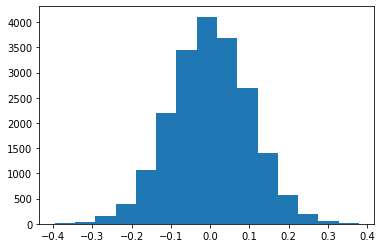

In [ ]:
plt.hist(vals,bins=15);

In [ ]:
#Estimador de variância para a distribuição acima? Considerando distribuição normal

In [ ]:
mean = np.mean(vals)

In [ ]:
S2 = np.std(vals)

In [ ]:
normal_distribution = stats.norm(scale=S2)

In [ ]:
k = 15
interval = np.linspace(np.min(vals),np.max(vals),k)

hist, bins = np.histogram(vals, bins=interval)

In [ ]:
hist

array([  10,   50,  185,  564, 1466, 2891, 4132, 4331, 3307, 1987,  768,
        240,   60,    9])

In [ ]:
norm_cdf = stats.norm.cdf(interval, scale=S2)

In [ ]:
area_bins = norm_cdf[1:] - norm_cdf[:-1]
frequencia_teorica = area_bins * vals.shape[0]

In [ ]:
vals.shape[0]

20000

In [ ]:
chi_calc = np.sum((frequencia_teorica - hist)**2/frequencia_teorica)

In [ ]:
#Para fazer a regra de rejeição, precisamos saber quem é chi_(a, k - p - 1)
chi_cut = stats.chi2.ppf(0.95,df=k-1-1)

In [ ]:
if chi_calc > chi_cut:
  print(f'Hipótese nula rejeitada pois Chi_calc ({chi_calc}) > Chi_cut ({chi_cut})')
else:
  print(f'Hipótese nula não rejeitada pois Chi_calc ({chi_calc}) < Chi_cut ({chi_cut})')

Hipótese nula não rejeitada pois Chi_calc (20.622788363210688 < Chi_cut (22.362032494826934


### Teste de igualdade de médias entre duas variáveis aleatórias. 

![Teoria](test_equal_means.jpg)

SOURCE: https://www.itl.nist.gov/div898/handbook/eda/section3/eda353.htm#:~:text=The%20two%2Dsample%20t%2Dtest,a%20current%20process%20or%20treatment

Agora tudo vai depender sobre o que determinamos sobre a variância destas variáveis. Vamos desenvolver um pouquinho mais no quadro.

Exercícios: Considere a base de dados Students Performance (https://www.kaggle.com/datasets/spscientist/students-performance-in-exams).

Faça testes estatísticos para verificar os seguintes pressupostos:

a) A média de *writting* para as meninas e meninos foi igual.

Parâmetro de interesse: $\mu_{1} e \mu_{2}$ 

Estimador para o nosso caso: $\bar{x_1}$ e $\bar{x_2}$ 

Estatística de teste: t (pois não conhecemos o desvio padrão). 

Hipótese Nula: $\mu_{1} = \mu_{2}$

Hipótese alternativa: $\mu \ne \mu_{2}$

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


(array([  3.,   2.,  15.,  54.,  96.,  89., 114.,  70.,  32.,   7.]),
 array([ 15. ,  23.5,  32. ,  40.5,  49. ,  57.5,  66. ,  74.5,  83. ,
         91.5, 100. ]),
 <BarContainer object of 10 artists>)

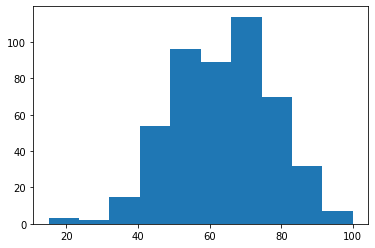

In [3]:
vals_male = df[df['gender'] == 'male']['writing score'].values
vals_female = df[df['gender'] == 'female']['writing score'].values
plt.hist(vals_male)

(array([  1.,   2.,   7.,  15.,  36.,  68., 108., 141.,  82.,  58.]),
 array([ 10.,  19.,  28.,  37.,  46.,  55.,  64.,  73.,  82.,  91., 100.]),
 <BarContainer object of 10 artists>)

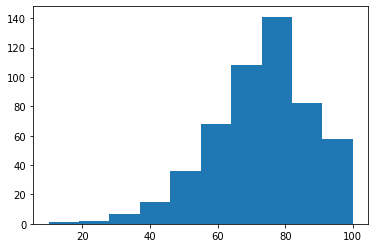

In [4]:
plt.hist(vals_female)

In [8]:
mean_male = vals_male.mean()
var_male = vals_male.var(ddof=1)
cnt_male = vals_male.shape[0]

mean_female = vals_female.mean()
var_female = vals_female.var(ddof=1)
cnt_female = vals_female.shape[0]

In [21]:
#Calculando o dvp_pooled
pooled_var = (var_male*(cnt_male - 1) + var_female*(cnt_female - 1)) / (cnt_male+cnt_female - 2)

In [22]:
pooled_var

210.1665947765699

In [23]:
#Calculando a estatística de teste (t ou z?)
t = (mean_male - mean_female)/(np.sqrt(pooled_var*(1/cnt_male + 1/cnt_female)))

In [24]:
t

-9.979557910004507

In [26]:
#Encontrando o valor de t_limite (usa 2,5% pq eh bi caudal)
stats.t.ppf(0.025, df=cnt_male+cnt_female-2)

-1.962343846216334

In [29]:
#Encontrando o p_value
p_value = stats.t.cdf(t,df=cnt_male+cnt_female-2)
p_value

1.009938853433967e-22

In [34]:
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(vals_male,vals_female)
pval


2.019877706867934e-22

#### Como o p_value é extremamente baixo, rejeitamos a Hipotese Nula.  Também podemos afirmar isso já que Tvalue<Tlimite. 

b) Independente do tipo de alimentação (*standard* ou *reduced*) do aluno, a média em matemática desses grupos é igual.

(array([  1.,   3.,  10.,  39.,  95., 131., 141., 111.,  77.,  37.]),
 array([ 19. ,  27.1,  35.2,  43.3,  51.4,  59.5,  67.6,  75.7,  83.8,
         91.9, 100. ]),
 <BarContainer object of 10 artists>)

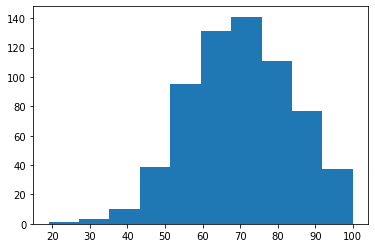

In [36]:
#Calculando as médias
vals_std = df[df['lunch'] == 'standard']['math score'].values
vals_rdc = df[df['lunch'] == 'free/reduced']['math score'].values
plt.hist(vals_std)


(array([ 2.,  1.,  9., 21., 63., 79., 93., 65., 15.,  7.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

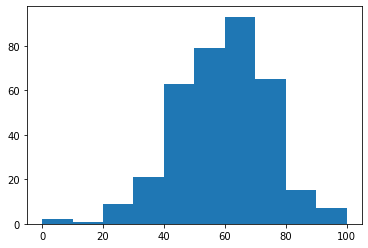

In [37]:
plt.hist(vals_rdc)

In [38]:
mean_std = vals_std.mean()
var_std = vals_std.var(ddof=1)
cnt_std = vals_std.shape[0]

mean_rdc = vals_rdc.mean()
var_rdc = vals_rdc.var(ddof=1)
cnt_rdc = vals_rdc.shape[0]

In [39]:
#Calculando o dvp_pooled
pooled_var = (var_std*(cnt_std - 1) + var_rdc*(cnt_rdc - 1)) / (cnt_std+cnt_rdc - 2)
pooled_var

201.81467050270427

In [40]:
#Calculando a estatística de teste (t ou z?)
t = (mean_std - mean_rdc)/(np.sqrt(pooled_var*(1/cnt_std + 1/cnt_rdc)))
t

11.837180472914612

In [41]:
#Encontrando o valor de z_limite
stats.t.ppf(0.025, df=cnt_std+cnt_rdc-2)

-1.962343846216334

In [42]:
#Encontrando o p_value
p_value = stats.t.cdf(t,df=cnt_male+cnt_female-2)
p_value

1.0

#### Como o p_value é maior que o grau de significancia (5%), NÃO rejeitamos a Hipotese Nula.  Também podemos afirmar isso já que Tvalue>Tlimite. 

### Teste para duas proporções.